# Linear Regression

In [173]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

here we give input size as 1 and output size as 1
epochs is basically the number of times our train will loop
learning rate determines the size of the step taken during optimization.
if the predicted value is way diff then it will take time to get to the actual value if the learning rate is too small.

Too big a step, and it might skip the best answer. Too small, and it might take forever to learn. It's about finding the right step size for your model to learn efficiently.

In [174]:
inputs = 1
outputs = 1
epochs = 60
learning_rate = 0.01

In [175]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)



Now building the nn, defining loss, and optimizer.

In [176]:
# Linear regression model
model = nn.Linear(inputs,outputs)

#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

this is finally our training loop..

we perform: forward pass, calculaate loss, loss backward, and then optimize.

Forward pass: passing input data through the model to generate predictions.

Loss: measures the difference between predictions and actual targets or actual values.

Loss Backwards: the model's parameters are updated based on the gradients of the loss with respect to the parameters.

Optimize: Adjusts the parameters using an optimization algorithm (here, gradient descent) to minimize the loss and improve the model's performance.

In [177]:
from torch.optim.lr_scheduler import StepLR


for epoch in range(epochs):
  input = torch.from_numpy(x_train)
  target = torch.from_numpy(y_train)

  # forward pass
  output = model(input)
  loss = criterion(output, target)

  # backward pass and optimiz
  loss.backward()

  optimizer.step()

  if(epoch+1)%5==0:
    print('epoch [{}/{}], loss: {:4f}'.format(epoch+1, epochs, loss.item()))

epoch [5/60], loss: 4.484053
epoch [10/60], loss: 3.251256
epoch [15/60], loss: 2.234414
epoch [20/60], loss: 1.433514
epoch [25/60], loss: 0.848512
epoch [30/60], loss: 0.479305
epoch [35/60], loss: 0.325278
epoch [40/60], loss: 0.312601
epoch [45/60], loss: 0.300594
epoch [50/60], loss: 0.287467
epoch [55/60], loss: 0.275576
epoch [60/60], loss: 0.264165


In [178]:
print("Predictions:", output.detach().numpy())
print("Targets:", target.numpy())


Predictions: [[1.1558547]
 [1.5760919]
 [1.9963291]
 [2.4585898]
 [2.542637 ]
 [1.4874601]
 [3.6310515]
 [2.256876 ]
 [2.7947795]
 [0.7230104]
 [2.585425 ]
 [4.0176697]
 [1.9248888]
 [2.9502673]
 [1.0794479]]
Targets: [[1.7  ]
 [2.76 ]
 [2.09 ]
 [3.19 ]
 [1.694]
 [1.573]
 [3.366]
 [2.596]
 [2.53 ]
 [1.221]
 [2.827]
 [3.465]
 [1.65 ]
 [2.904]
 [1.3  ]]


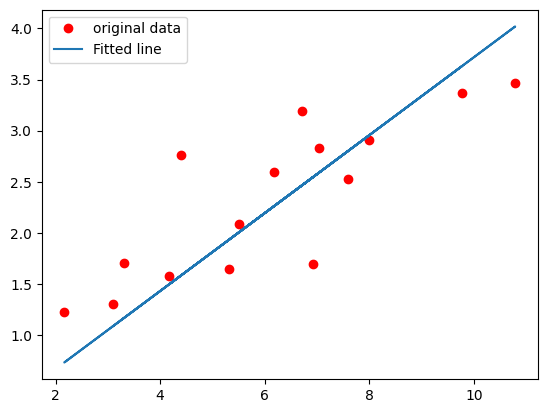

In [179]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label = 'original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [180]:
torch.save(model.state_dict(), 'model.ckpt')